In [1]:

%pprint
import sys
sys.path.insert(1, '../py')

Pretty printing has been turned OFF


In [2]:

from datetime import timedelta
from notebook_utils import NotebookUtilities
from pandas import DataFrame
import humanize
import matplotlib.pyplot as plt
import numpy as np
import os
import os.path as osp
import pandas as pd
import re

nu = NotebookUtilities(
    data_folder_path=osp.abspath('../data'),
    saves_folder_path=osp.abspath('../saves')
)
[f'nu.{fn}' for fn in dir(nu) if 'github' in fn]

['nu.github_folder']

In [46]:

[f'nu.{fn}' for fn in dir(nu) if 'checkpoint' in fn] 

['nu.delete_ipynb_checkpoint_folders']

In [50]:

# Set the folder path
root_folder_path = '../builders'
!start %windir%\explorer.exe "{os.path.abspath(root_folder_path)}"

In [51]:

# Get the list of file names in the folder
file_type = '.ipynb'
file_names = []
black_list = ['.ipynb_checkpoints', '$Recycle.Bin']
nu.delete_ipynb_checkpoint_folders(nu.github_folder)
for folder_path, directories_list, files_list in os.walk(root_folder_path):
    if all(map(lambda x: x not in folder_path, black_list)):
        file_names.extend([fn.replace(file_type, '') for fn in os.listdir(folder_path) if fn.endswith(file_type)])

# Combine file names into a single string
text = ' '.join(file_names)

In [52]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Tokenize the content (split into space-delimited words)
tokenized_content = [re.findall(r'\b\w+\b', content) for content in file_names]

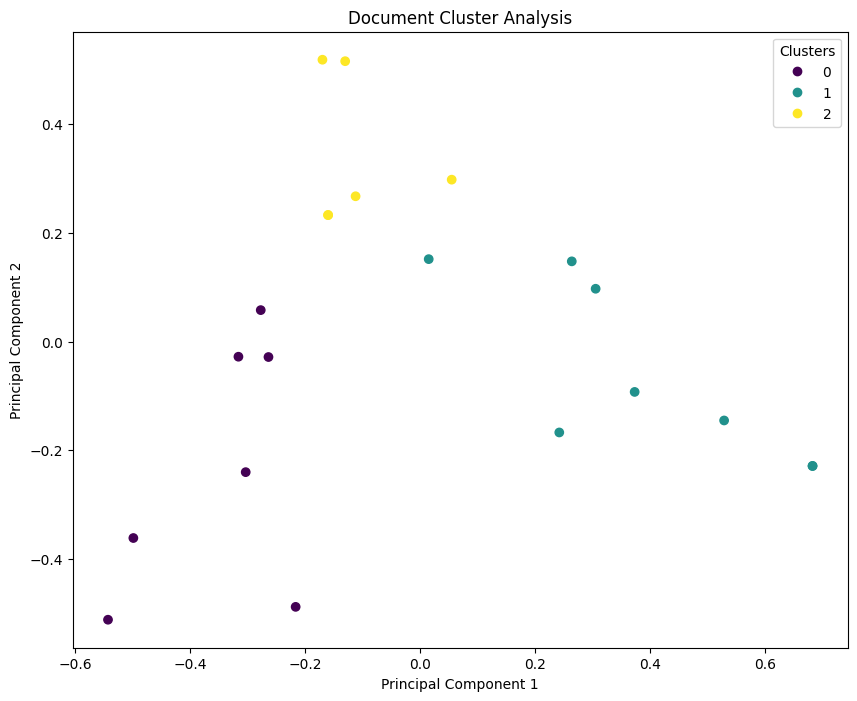

In [55]:

# Convert the list of space-delimited strings into a single string per file
processed_documents = [' '.join(tokens) for tokens in tokenized_content]

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(processed_documents)

# Apply K-means clustering
num_clusters = 3  # You can adjust this based on your dataset
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(X)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Visualize the clusters in a scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Document Cluster Analysis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.show()

In [56]:

# Print file names grouped by cluster
file_names_by_cluster = {}
for cluster_id, file_name in zip(clusters, file_names):
    if cluster_id not in file_names_by_cluster:
        file_names_by_cluster[cluster_id] = []
    file_names_by_cluster[cluster_id].append(file_name)

# Print the results
for cluster_id, files in file_names_by_cluster.items():
    print(f'Cluster {cluster_id}:\n', files)
    print()

Cluster 1:
 ['Build a Complete Part-of-Speech Dictionary', 'Build H-RQ Dictionary from Examples', 'Build NavigableParents SQL from Examples', 'Build NP Graph from Examples', 'Build O-RQ Dictionary from Examples', 'Build O-TS Dictionary from Examples', 'Build POS Conditional Random Field Elements', 'Build the Child Strings List Dictionary from Examples']

Cluster 2:
 ['Get Longest Path', 'Get Parts-of-Speech Value Counts', 'Ingest CSV and HTML Files', 'Recreate the Header Pattern Dictionary', 'Set Educational Flags in NP Graph', 'Set Is Header Attribute']

Cluster 0:
 ['Populate All Child Tag Sequences for FileNames', 'Populate Cypher Tables and Relationships', 'Populate the HeaderTagSequence Table', 'Populate the NavigableParentSequence Table', 'SQL Table Creation', 'Truncate Repeating NP IDs from NPS Table', 'Update NavigableParentSequence Table from Examples']



In [17]:

wordcloud.process_text(text)

{'Build': 11, 'Complete': 1, 'Part': 2, 'Speech': 2, 'Dictionary': 6, 'Corporate': 1, 'Scope': 2, 'Educational': 2, 'Requirement': 2, 'Estimators': 1, 'grid_search_params': 1, 'H': 1, 'RQ': 2, 'Examples': 7, 'Interview': 1, 'Procedure': 1, 'Job': 3, 'Duration': 1, 'Title': 1, 'Legal': 1, 'Notifications': 1, 'NavigableParents': 1, 'SQL': 2, 'NP': 4, 'Graph': 2, 'O': 2, 'TS': 1, 'Office': 1, 'Location': 1, 'POS': 1, 'Conditional': 1, 'Random': 1, 'Field': 1, 'Elements': 1, 'Posting': 1, 'Date': 1, 'Preferred': 1, 'Qualification': 1, 'Resume': 1, 'Work': 1, 'Experience': 1, 'Notebook': 1, 'Names': 1, 'Supplemental': 1, 'Pay': 1, 'Task': 1, 'Child': 2, 'Strings': 1, 'Longest': 1, 'Path': 1, 'Value': 1, 'Counts': 1, 'Ingest': 1, 'CSV': 1, 'HTML': 1, 'Files': 1, 'Load': 1, 'Indeed': 1, 'Populate': 4, 'Tag': 1, 'Sequences': 1, 'FileNames': 1, 'Cypher': 1, 'Relationships': 1, 'HeaderTagSequence': 1, 'Table': 6, 'NavigableParentSequence': 2, 'Recreate': 1, 'Pattern': 1, 'Set': 2, 'Flags': 1, 'A

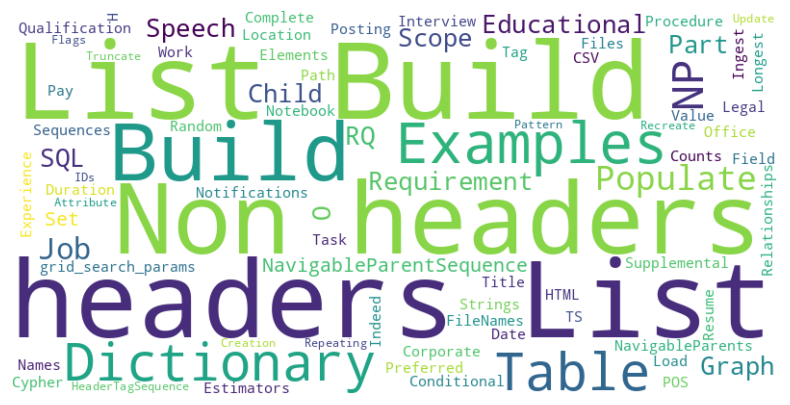

In [14]:

from wordcloud import WordCloud

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the Word Cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()